<a href="https://colab.research.google.com/github/FreddyR424/Deep_Learning/blob/master/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Handwritten Digit Classification using a CNN**

## **Dataset Intro**
- This dataset consists of 60,000 grayscale images, which are small 28x28 pixel images.
These are images of handwritten digits from 0 to 9.
- The task is to correctly classify the image of a handwritten digit into the right number, that is - one of the 10 numbers from 0 to 9.
- These numbers are mutually exclusive choices and we have over two choices in number, and hence this represents a multi-class classification problem in supervised learning.
- MNIST has been an important and widely-used dataset in machine learning and computer vision. It is sometimes called the "Hello World" of computer vision, and is one of the first image datasets that all deep learning based computer vision practitioners learn to work with. A great amount of research have been carried out to outperform the existing state-of-the-art and achieve the best possible accuracy in classifying the images in MNIST.
It is hence a benchmark of sorts, to test the latest deep learning architectures in the field of computer vision.
- More importantly for us, MNIST is a dataset where Convolutional Neural Network (CNN) based approaches have shown excellent performance, and that is what we will try to implement as part of this case study.

## **Imports**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adam,SGD
import warnings
warnings.filterwarnings("ignore")

## **Loading the Dataset**

In [3]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

- The first dimension 60000 denotes the number of images in the training data, and each image is stacked on top of the other, making it a 3-dimensional Numpy array.
- The second and third dimensions 28, 28 denote the number of pixels along the height and width of the 2-dimensional image.

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

- The target labels are numerical digits between 0 to 9.

In [7]:
X_test.shape

(10000, 28, 28)

- The test dataset has 10,000 images. Each image, as before, is a 28x28 square image.

## **Data Visualization**
### **Converting the Numpy arrays to images and visualizing a few random images**

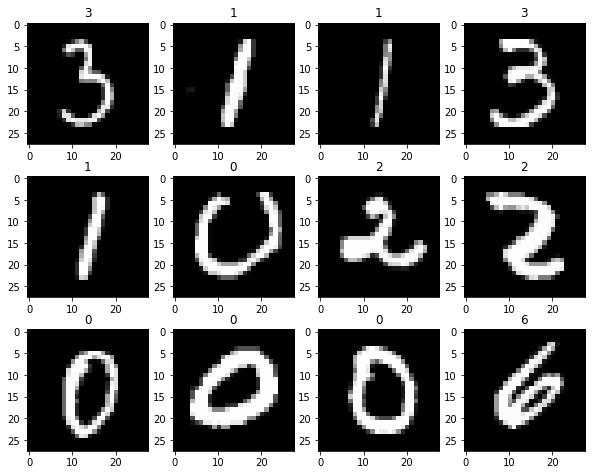

In [8]:
num_classes = 10
categories = np.unique(y_train)
rows = 3
cols = 4
fig = plt.figure(figsize = (10, 8))
for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.imshow(X_train[random_index, :], cmap = plt.get_cmap('gray'))
    ax.set_title(categories[y_train[random_index]])
plt.show()

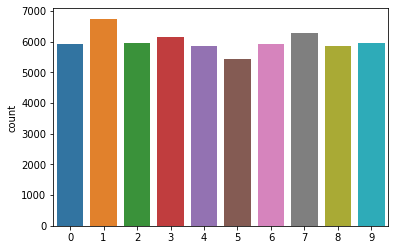

In [12]:
# Plot distribution of each category
count_plot = sns.countplot(y_train)

- the dataset appears to be quite balanced, with each category having approximately the same number of images.
- Accuracy should be a good evaluation metric for the model performance in this case study.

## **Data Preparation**
- reshape the dataset to have a single channel and we also normalize the feature inputs.
- Normalization

- reshape the arrays to just have a single channel.

In [13]:
# Reshape dataset for single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

- divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [14]:
# Normalizing Image Pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

- the output layer should have 10 neurons which will provide us with the probabilities of the input image belonging to each of those 10 classes.

In [15]:
# Creating one-hot encoded representation of target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

## **Model Building - Artificial Neural Network (ANN)**
#### **Defining an Artificial Neural Network (ANN) Model**
- will be created sequentially, by adding the layers one after another.

In [16]:
# fixing seed for radom number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

**Building sequential ANN model**

In [17]:
# Intializing a sequential model
ann_model = Sequential()

# Flatten the input to add dense convolutional layers on top of it
ann_model.add(Flatten(input_shape = (28, 28)))

# Adding a sequential layer with 100 neurons
ann_model.add(Dense(100, activation = 'relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
ann_model.add(Dense(10, activation = 'softmax'))

# using SGD Optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)

# Compile Model
ann_model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

# Generating summary of model
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### **Understanding parameters of each layer:**
**Flatten Layer:**
- the input shape to the layer is (28,28). It does not have any parameters, so the number of parameters is 0.

**Fully Connected Dense Layer:**
- Number of neurons: 100
- Number of parameters: (784x100)+(1x100): 78400+100: 78500

**Output Layer:**
- Number of neurons: 10
- Number of parameters: (10x100)+(1x10) = 1010

### **Fitting model on the train data**

In [18]:
history = ann_model.fit(
    X_train_normalized, y_train_encoded,
    epochs = 15,
    validation_split = 0.1,
    shuffle = True,
    batch_size = 64,
    verbose = 2
)

Epoch 1/15
844/844 - 5s - loss: 0.4176 - accuracy: 0.8819 - val_loss: 0.2073 - val_accuracy: 0.9413 - 5s/epoch - 6ms/step
Epoch 2/15
844/844 - 3s - loss: 0.2185 - accuracy: 0.9378 - val_loss: 0.1574 - val_accuracy: 0.9577 - 3s/epoch - 4ms/step
Epoch 3/15
844/844 - 4s - loss: 0.1653 - accuracy: 0.9529 - val_loss: 0.1271 - val_accuracy: 0.9653 - 4s/epoch - 4ms/step
Epoch 4/15
844/844 - 3s - loss: 0.1351 - accuracy: 0.9621 - val_loss: 0.1140 - val_accuracy: 0.9670 - 3s/epoch - 4ms/step
Epoch 5/15
844/844 - 4s - loss: 0.1147 - accuracy: 0.9671 - val_loss: 0.1032 - val_accuracy: 0.9702 - 4s/epoch - 4ms/step
Epoch 6/15
844/844 - 3s - loss: 0.0996 - accuracy: 0.9721 - val_loss: 0.0939 - val_accuracy: 0.9727 - 3s/epoch - 4ms/step
Epoch 7/15
844/844 - 3s - loss: 0.0880 - accuracy: 0.9750 - val_loss: 0.0877 - val_accuracy: 0.9765 - 3s/epoch - 4ms/step
Epoch 8/15
844/844 - 3s - loss: 0.0784 - accuracy: 0.9775 - val_loss: 0.0859 - val_accuracy: 0.9768 - 3s/epoch - 3ms/step
Epoch 9/15
844/844 - 3s 

## **Model Evaluation**

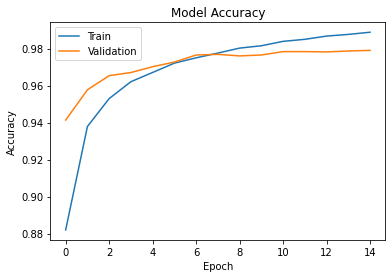

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

- the model has perfomed well on the train and validation data, with a validation accuracy of 97%.

## **Evaluating the model on the test data**

In [20]:
accuracy = ann_model.evaluate(X_test_normalized, y_test_encoded, verbose = 2)

313/313 - 1s - loss: 0.0773 - accuracy: 0.9768 - 1s/epoch - 4ms/step


## **Generating Predictions using the test data**

In [21]:
# Output as probabilities for each category
y_pred = ann_model.predict(X_test_normalized)

313/313 [==============================] - 1s 4ms/step


## **Plotting Confusion Matrix**
- The Confusion matrix expects the input to be of categorical values. But the y_test_encoded is an encoded value, and y_pred has probablities. So we need to get the categorical values back from the encoded values.
- We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

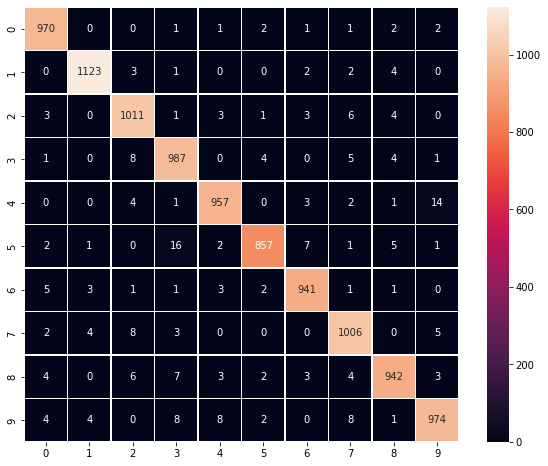

In [22]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis = 1)
y_test_arg = np.argmax(y_test_encoded, axis = 1)

# Plotting the Confusion Matrix using confusion matrix()
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)
f, ax = plt.subplots(figsize= (10, 8))
sns.heatmap(
    confusion_matrix,
    annot= True,
    linewidths= .4,
    fmt= "d",
    square= True,
    ax= ax
)
plt.show()

- most of the classes are predicted correctly, and the misclassification occurs mostly with the digit 4 which is sometimes confused with digit 9, and digit 5 which is sometimes confused with digit 3.

## **Model Building - Convolutional Neural Network (CNN)**
- create a CNN model sequentially, where we will be adding the layers one after another.

In [23]:
# clear backend
from tensorflow.keras import backend
backend.clear_session()

In [24]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Building CNN Model**
**The model has 2 main parts:**

- 1. The Feature Extraction layers which are comprised of convolutional and pooling layers.
- 2. The Fully Connected classification layers for prediction.

### **Model Flow:**
- start with a sequential Conv2D layer with 64 filters of 3x3 filter with the ReLU activation function. This will take as input an image of size (28x28x1).
- padding in order to keep the output shape the same as that of the input shape. Hence, the hyperparameter padding = 'same'.
- 2 more pairs of Conv2D and Max Pooling layers, having 32 filters with a 3x3 Kernel Size and a pooling size of (2,2).
- flatten out the output from this pooling layer, and use a dense layer over that.
- dense layer of 100 neurons (the same as the ANN)
- output layer with 10 neurons, as we have 10 output classes in this multi-class classification problem.

In [25]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = "same", input_shape = (28, 28, 1)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = "same"))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))
model.add(Conv2D(32, (3, 3), activation = 'relu', padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons 
model.add(Dense(100, activation = 'relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(10, activation = 'softmax'))

# using SGD optimizer
opt = SGD(learning_rate = 0.01, momentum = 0.9)

# compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# generate summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

### **Parameters of CNN Layers:**
**First Conv2D Layer:**
- The input shape to the Conv2D layer: (28,28,1)
- The Size of the Filter: 3x3
- The Number of Filters: 64
- The Number of parameters: (3x3x1+1)x64 = 640

**Max Pooling Layer:**
- Pooling has no trainable parameters, so the number of parameters: 0

**Flatten:**
- does not have any trainable parameters, so the number of parameters: 0

**Fully Connected Dense Layer:**
- Number of neurons: 100
- Number of parameters: (100x512)+(1x100): 51300

**Output Layer:**
- Number of neurons: 10
- Number of parameters: (10x100)+(1x10)=1010

## **Fitting the model on the train data**

In [27]:
history_1 = model.fit(
    X_train_normalized, y_train_encoded,
    epochs = 15,
    validation_split = 0.1,
    shuffle = True,
    batch_size = 64,
    verbose = 2)

Epoch 1/15
844/844 - 115s - loss: 0.1280 - accuracy: 0.9597 - val_loss: 0.0761 - val_accuracy: 0.9757 - 115s/epoch - 136ms/step
Epoch 2/15
844/844 - 104s - loss: 0.0694 - accuracy: 0.9786 - val_loss: 0.0555 - val_accuracy: 0.9825 - 104s/epoch - 123ms/step
Epoch 3/15
844/844 - 92s - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0413 - val_accuracy: 0.9885 - 92s/epoch - 109ms/step
Epoch 4/15
844/844 - 91s - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0478 - val_accuracy: 0.9872 - 91s/epoch - 108ms/step
Epoch 5/15
844/844 - 92s - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0373 - val_accuracy: 0.9885 - 92s/epoch - 109ms/step
Epoch 6/15
844/844 - 90s - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0389 - val_accuracy: 0.9893 - 90s/epoch - 107ms/step
Epoch 7/15
844/844 - 90s - loss: 0.0248 - accuracy: 0.9921 - val_loss: 0.0382 - val_accuracy: 0.9893 - 90s/epoch - 106ms/step
Epoch 8/15
844/844 - 89s - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0343 - val_accuracy: 0.9908 - 89s/epoch -

## **Model Evaluation**

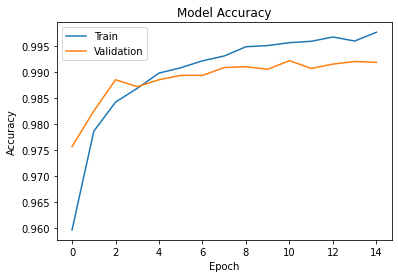

In [28]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

- the model has perfomed well on train and validation data with a validation accuracy of 98%.

## **Evaluating the model on test data**

In [29]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

313/313 - 4s - loss: 0.0325 - accuracy: 0.9904 - 4s/epoch - 13ms/step


## **Generating the predictions using test data**

In [30]:
y_pred=model.predict(X_test_normalized)
y_pred

313/313 [==============================] - 5s 15ms/step


array([[1.2635819e-17, 6.9508413e-13, 7.0289351e-11, ..., 9.9999994e-01,
        3.3643340e-15, 1.9003596e-13],
       [4.5682871e-11, 8.9567138e-08, 9.9999982e-01, ..., 5.7979004e-11,
        1.4481789e-13, 1.3977236e-14],
       [4.1098582e-09, 9.9999052e-01, 2.3647928e-07, ..., 7.5529065e-06,
        1.3454614e-07, 1.6462693e-07],
       ...,
       [4.5014693e-19, 1.9299241e-14, 1.6071269e-17, ..., 1.3450980e-11,
        2.1571436e-12, 8.3292090e-14],
       [7.5447221e-10, 1.6453398e-17, 3.0419391e-16, ..., 8.1716792e-14,
        2.2580411e-05, 2.7462219e-14],
       [3.8558493e-13, 2.8598309e-14, 3.1838480e-11, ..., 4.5895851e-20,
        1.6946284e-12, 1.2125573e-19]], dtype=float32)

## **Plotting Confusion Matrix**

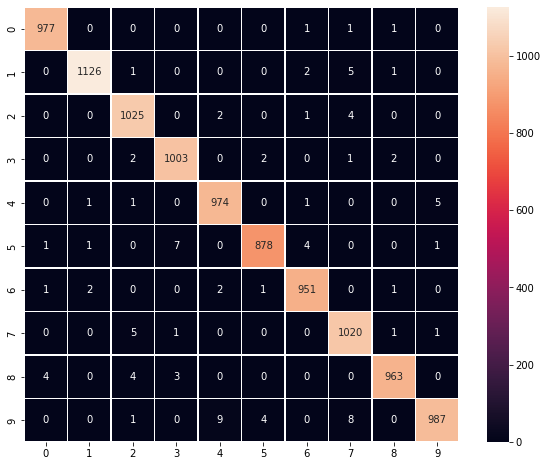

In [31]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

-  most of the classes are predicted correctly.
- The misclassification mostly with the the digits 4 and 8, which are confused with digit 9.

## **Comparing the number of parameters in ANNs and CNNs**
- The total number of trainable parameters in the ANN were: 79,510.
- The total number of trainable parameters in the CNN are: 80,662.
- For the ANN model, we had to flatten our input image of size (28,28,1) to (784,1). This was followed by two dense layers with the same number of nodes that we used while building the CNN Model.
- Using just 2 dense layers after Flatten() in the ANN model, resulted in nearly the same number of parameters as the whole CNN model, despite the CNN having the added advantage of multiple convolution layers for feature extraction.